In [101]:
%matplotlib inline
import kgimgproc as kgp
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
import matplotlib.patches as mpatches
import scipy.io as sio

In [84]:
reload(kgp)

<module 'kgimgproc' from '/Users/jacob/Documents/Home/keyboardguys/explorations/kgimgproc.py'>

In [2]:
notes = pd.read_csv("../../homus_all_standardized.csv", index_col = 0)

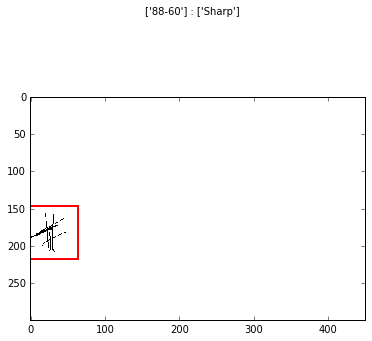

In [95]:
kgp.plot_image(notes, '88-60')

In [94]:
img1 = kgp.segment_image(notes, '88-60')

plt.imshow(img1, cmap='Greys_r', interpolation = "nearest")

ValueError: Buffer not C contiguous.

In [61]:
noteids = list(notes['id'].unique())
list(enumerate(notes['y'].unique()))

[(0, '12-8-Time'),
 (1, '2-4-Time'),
 (2, 'Quarter-Note'),
 (3, 'Quarter-Rest'),
 (4, 'Sharp'),
 (5, 'Sixteenth-Note'),
 (6, 'Sixteenth-Rest'),
 (7, 'Sixty-Four-Note'),
 (8, 'Sixty-Four-Rest'),
 (9, '3-4-Time'),
 (10, 'Thirty-Two-Note'),
 (11, 'Thirty-Two-Rest'),
 (12, 'Whole-Half-Rest'),
 (13, 'Whole-Note'),
 (14, '3-8-Time'),
 (15, '4-4-Time'),
 (16, '6-8-Time'),
 (17, '9-8-Time'),
 (18, 'Barline'),
 (19, 'C-Clef'),
 (20, 'Common-Time'),
 (21, 'Cut-Time'),
 (22, 'Dot'),
 (23, '2-2-Time'),
 (24, 'Double-Sharp'),
 (25, 'Eighth-Note'),
 (26, 'Eighth-Rest'),
 (27, 'F-Clef'),
 (28, 'Flat'),
 (29, 'G-Clef'),
 (30, 'Half-Note'),
 (31, 'Natural')]

In [121]:
# Exporting to Octave
X = np.zeros([1600, 800]) # Columns of X are individual examples
y = np.zeros([800, 1]) # y(i) correspons to example X(:,1)

sharps = notes[notes['y'] == 'Sharp']
flats = notes[notes['y'] == 'Flat']

dset = sharps.append(flats)

In [122]:
noteids = list(dset['id'].unique())
for indx, unqnote in enumerate(noteids):
    if indx % 10 == 0:
        print('Processed ' + str(indx) + ' examples')
    try:
        f = kgp.segment_image(dset, unqnote).flatten()
    except:
        f = np.zeros(1600)
        print("Segmentation error on example " + unqnote)
    X[:,indx] = f
    if dset['y'].loc(indx) == "Sharp":
        y[indx] = 1
    else:
        y[indx] = 0

Processed 0 examples
Processed 10 examples
Processed 20 examples
Processed 30 examples
Processed 40 examples
Processed 50 examples
Processed 60 examples
Processed 70 examples
Processed 80 examples
Processed 90 examples
Processed 100 examples
Processed 110 examples
Processed 120 examples
Processed 130 examples
Processed 140 examples
Processed 150 examples
Processed 160 examples
Processed 170 examples
Processed 180 examples
Processed 190 examples
Processed 200 examples
Processed 210 examples
Processed 220 examples
Processed 230 examples
Processed 240 examples
Processed 250 examples
Processed 260 examples
Processed 270 examples
Processed 280 examples
Processed 290 examples
Processed 300 examples
Processed 310 examples
Processed 320 examples
Processed 330 examples
Processed 340 examples
Processed 350 examples
Segmentation error on example 88-60
Processed 360 examples
Processed 370 examples
Processed 380 examples
Processed 390 examples
Processed 400 examples
Processed 410 examples
Processed

In [123]:
sio.savemat('np_vectors.mat', {'X':X, 'y':y})

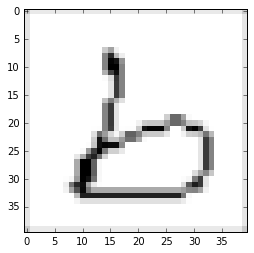

In [118]:
plt.imshow(np.reshape(X[:,799],[40,40]), cmap = "Greys_r", interpolation="nearest")

In [120]:
X[550:650,799]

array([ 255.    ,  255.    ,  255.    ,  255.    ,  255.    ,  255.    ,
        255.    ,  255.    ,  255.    ,  207.1875,  207.1875,  255.    ,
        255.    ,  255.    ,  255.    ,  255.    ,  255.    ,  255.    ,
        255.    ,  255.    ,  255.    ,  255.    ,  255.    ,  255.    ,
        255.    ,  207.1875,   47.8125,  111.5625,  255.    ,  255.    ,
        255.    ,  255.    ,  255.    ,  255.    ,  255.    ,  255.    ,
        255.    ,  255.    ,  255.    ,  255.    ,  255.    ,  255.    ,
        255.    ,  255.    ,  255.    ,  255.    ,  255.    ,  255.    ,
        255.    ,  207.1875,  207.1875,  255.    ,  255.    ,  255.    ,
        255.    ,  255.    ,  255.    ,  255.    ,  255.    ,  255.    ,
        255.    ,  255.    ,  255.    ,  255.    ,  255.    ,  207.1875,
         47.8125,  111.5625,  255.    ,  255.    ,  255.    ,  255.    ,
        255.    ,  255.    ,  255.    ,  255.    ,  255.    ,  255.    ,
        255.    ,  255.    ,  255.    ,  255.    , 

In [134]:
d1 = 10
d2 = 20
a = d1*d1
b = d2*d2
sums = 0
while a <= 1000*1000:
    sums += (1000*1000) / a
    d1 = d1 + 2
    a = d1 * d1
while b <= 1000*1000:
    sums += (1000*1000) / b
    d2 = d2 + 2
    b = d2 * d2
print(sums)

80623.32218803398


In [130]:
10000/(4*60)*10

416.66666666666663

In [136]:
1000*1000/(12*12)

6944.444444444444